# Building A Handwritten Digits Classifier (Artificial Neural Networks)

In this project I will:

* Explore why image classification is a hard task
* Observe the limitations of traditional machine learning models for image classification
* Train, test, and improve a few different deep neural networks for image classification

## Why is image classifcation a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

## Data Exploration

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mtick
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

data = load_digits()
df = pd.DataFrame(data.data)
df['target'] = pd.Series(data.target)
features = df.drop('target',axis=1)
target = df['target']

In [2]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


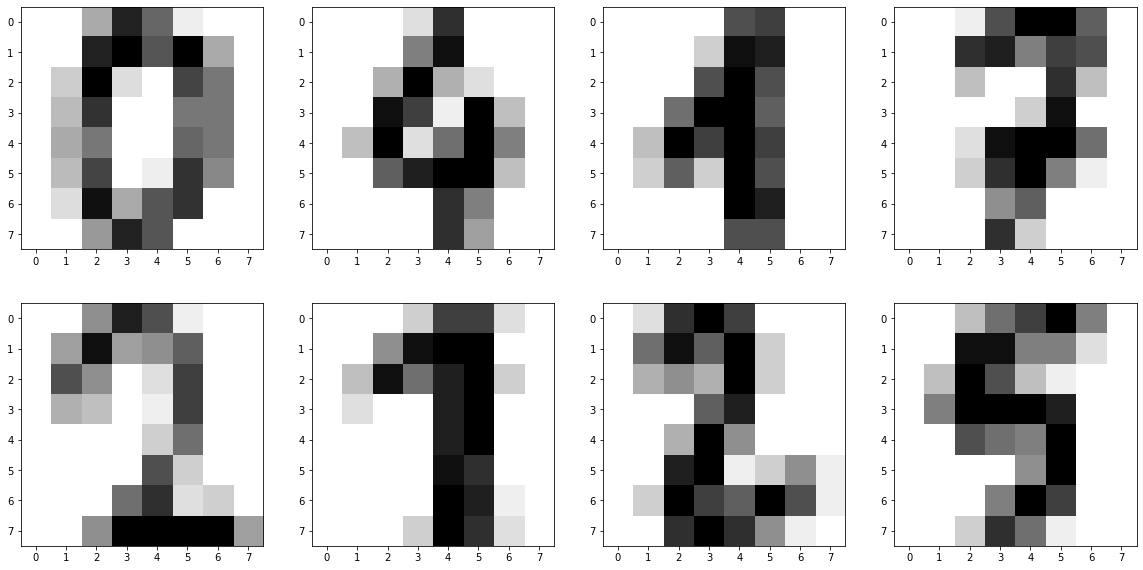

In [4]:
fig = plt.figure(figsize=(20,10))
for i in range(0,8):
    ax = fig.add_subplot(2,4,i+1)
    if i < 4:
        image = features.iloc[i * 100]
    else:
        image = features.iloc[1000 + i * 100]
    image = image.values
    image = image.reshape(8,8)
    plt.imshow(image, cmap='gray_r')
plt.show()

## Using traditional Machine Learning Algorithms

In [5]:
def run_cluster(df, k):
    score = []
    kf = KFold(10, shuffle=True, random_state=1)
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, features, target, cv=kf)
    average_score = scores.mean()
    return average_score

In [6]:
accuracy_scores = []
for k in range(2,20):
    score = run_cluster(df,k)
    accuracy_scores.append(score)

In [7]:
accuracy_scores

[0.9860955927995034,
 0.9877653631284916,
 0.9866511483550591,
 0.9877622594661701,
 0.9849751707014278,
 0.9849720670391061,
 0.9838578522656736,
 0.9833022967101179,
 0.9821911855990069,
 0.9838578522656736,
 0.9816294227188083,
 0.9827374301675977,
 0.9810738671632526,
 0.980512104283054,
 0.979400993171943,
 0.9777312228429548,
 0.976617008069522,
 0.9749534450651769]

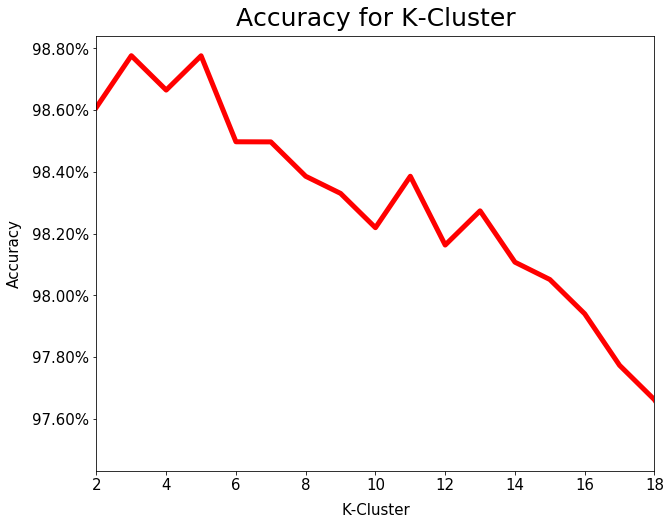

In [8]:
k = [k for k in range(2,20)]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.set_title('Accuracy for K-Cluster', size = 25, pad = 10)
ax.set_xlabel('K-Cluster', size = 15, labelpad = 10)
ax.set_ylabel('Accuracy', size = 15, labelpad = 10)
ax.set_xlim(2,18)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_tick_params(labelsize=15)
plt.plot(k,accuracy_scores, lw = 5, c = 'red')

We can see that the more information (k) the KNN algorithm uses to make predictions about the classification the less accurate it becomes, although the model is relatively accurate overall.

But, there are a few downsides to using k-nearest neighbors:

* High memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* No model representation to debug and explore

## Using Deep Neural Networks

### Single Hidden Layer Network (Simple Feed-Forward Network)

In [9]:
def run_onehidden_ANN(df, neurons):
    score = []
    kf = KFold(10, shuffle=True, random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes = (neurons,), random_state = 1, max_iter = 1000)
    scores = cross_val_score(mlp, features, target, cv=kf)
    average_score = scores.mean()
    return average_score

In [10]:
neurons = [8,16,32,64,128,256]
accuracy_scores = []
for neuron_count in neurons:
    score = run_onehidden_ANN(df,neuron_count)
    accuracy_scores.append(score)

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


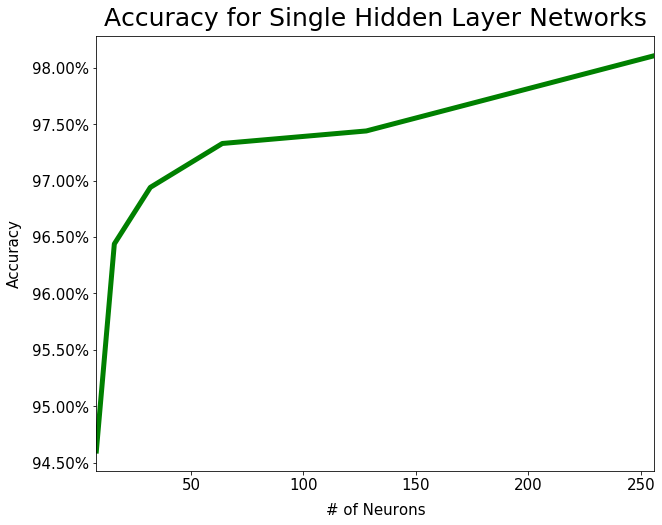

In [11]:
neuron_count = [k for k in neurons]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.set_title('Accuracy for Single Hidden Layer Networks', size = 25, pad = 10)
ax.set_xlabel('# of Neurons', size = 15, labelpad = 10)
ax.set_ylabel('Accuracy', size = 15, labelpad = 10)
ax.set_xlim(8,256)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_tick_params(labelsize=15)
plt.plot(neuron_count,accuracy_scores, lw = 5, c = 'green')

We can see that the model is even better at predicting than the KNN algorithm and has less downsides. The single layer ANN gets better with the more neurons the model includes.

### Double Hidden Layer Network (Simple Feed-Forward Network)

In [15]:
def run_twohidden_ANN(df, neurons):
    score = []
    kf = KFold(10, shuffle=True, random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes = (neurons,neurons,), random_state = 1, max_iter = 1000)
    scores = cross_val_score(mlp, features, target, cv=kf)
    average_score = scores.mean()
    return average_score

In [16]:
neurons = [8,16,32,64,128,256]
accuracy_scores = []
for neuron_count in neurons:
    score = run_twohidden_ANN(df,neuron_count)
    accuracy_scores.append(score)

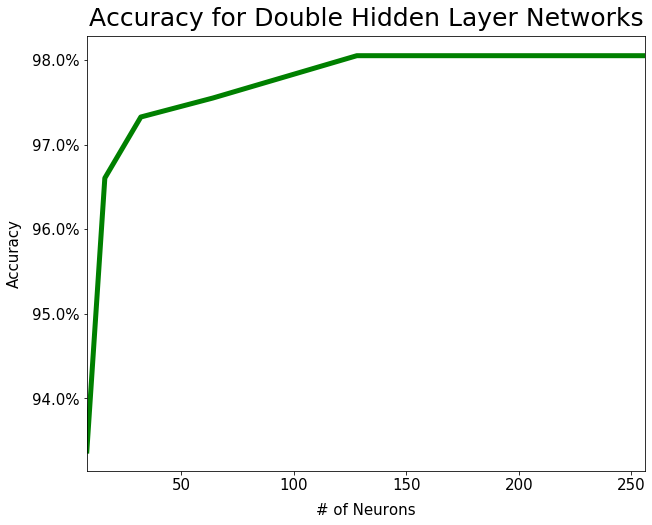

In [17]:
neuron_count = [k for k in neurons]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.set_title('Accuracy for Double Hidden Layer Networks', size = 25, pad = 10)
ax.set_xlabel('# of Neurons', size = 15, labelpad = 10)
ax.set_ylabel('Accuracy', size = 15, labelpad = 10)
ax.set_xlim(8,256)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_tick_params(labelsize=15)
plt.plot(neuron_count,accuracy_scores, lw = 5, c = 'green')

When creating the ANNs with two hidden layers we are able to get to a higher accuracy with less neurons per hidden layer.

### Triple Hidden Layer Network (Simple Feed-Forward Network)

In [19]:
def run_threehidden_ANN(df, neurons):
    score = []
    kf = KFold(10, shuffle=True, random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes = (neurons,neurons,neurons,), random_state = 1, max_iter = 1000)
    scores = cross_val_score(mlp, features, target, cv=kf)
    average_score = scores.mean()
    return average_score

In [20]:
neurons = [8,16,32,64,128,256]
accuracy_scores = []
for neuron_count in neurons:
    score = run_threehidden_ANN(df,neuron_count)
    accuracy_scores.append(score)

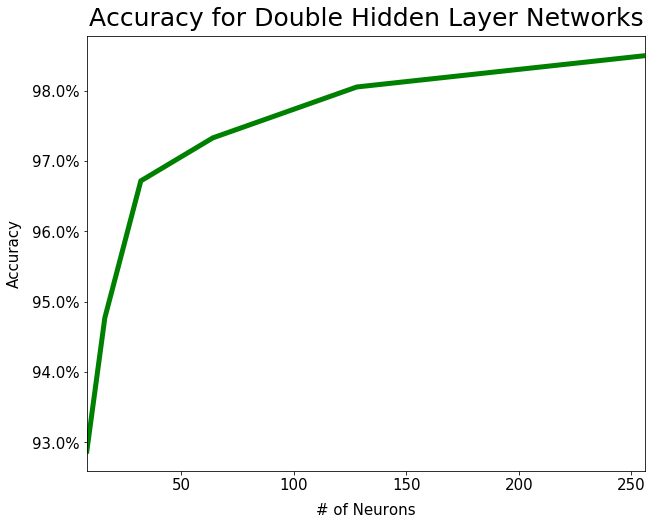

In [21]:
neuron_count = [k for k in neurons]
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.set_title('Accuracy for Double Hidden Layer Networks', size = 25, pad = 10)
ax.set_xlabel('# of Neurons', size = 15, labelpad = 10)
ax.set_ylabel('Accuracy', size = 15, labelpad = 10)
ax.set_xlim(8,256)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.yaxis.set_tick_params(labelsize=15)
plt.plot(neuron_count,accuracy_scores, lw = 5, c = 'green')

Here we can see that the additional hidden layer did not necessarily equate to proportional performance improvements. Creating the structre of a neural networks layers can be optimized through many iterations. We took a few of those setps hers, but we could start to change the amount of nodes in each hidden layer, change the activation functions, and the types of nodes we are using in our network. 

This project shows the value of neural networks at a basic level and how they can be easily implemented for predictions on image classification.